# Introduction to Data Visualization with Matplotlib

# Introduction of Matplotlib

## using the matplotlib.pyplot interface

In [42]:
# get data from sklearn library
from sklearn import datasets
import pandas as pd
import numpy as np

wine_data = pd.DataFrame(datasets.load_wine().data)
wine_data.columns = datasets.load_wine().feature_names

In [2]:
# using the matplotlib.pyplot interface

# import the matplotlib.pyplot submodule
import matplotlib.pyplot as plt

# create a figure and axes with plt.subplots
fig, ax = plt.subplots()

# plot color intensity against total phenols
ax.plot(wine_data['total_phenols'].values, wine_data['color_intensity'].values)

# plot color intensity against ash
ax.plot(wine_data['ash'].values, wine_data['color_intensity'].values)

# call the show function to show the result
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Customizing data appearance

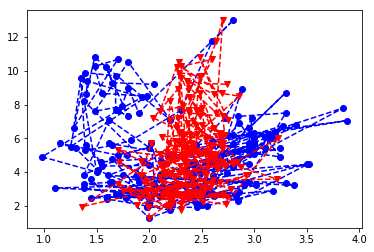

In [4]:
# create a figure and axes with plt.subplots
fig, ax = plt.subplots()

# plot color intensity against total phenols
ax.plot(wine_data['total_phenols'].values, wine_data['color_intensity'].values, marker ='o', linestyle ='--', color='b')

# plot color intensity against ash
ax.plot(wine_data['ash'].values, wine_data['color_intensity'].values, marker='v', linestyle='--', color='r')

# call the show function to show the result
plt.show()

## Customizing axis labels and adding titles

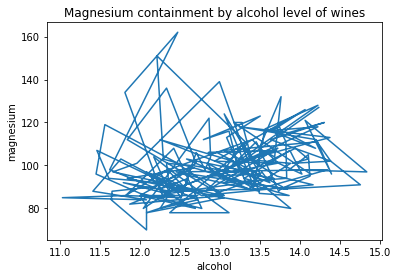

In [5]:
# create figure and axes with plt.subplots()
fig, ax = plt.subplots()

ax.plot(wine_data['alcohol'].values, wine_data['magnesium'].values)

# customize the x-axis label
ax.set_xlabel("alcohol")

# customize the y-year label
ax.set_ylabel("magnesium")

ax.set_title("Magnesium containment by alcohol level of wines")

# display the figure
plt.show()

## Creating a grid of subplots

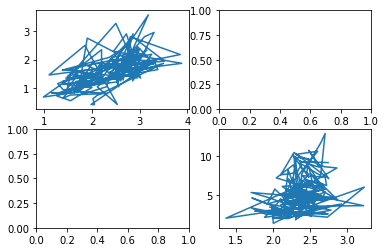

In [6]:
# create a figure a Figure and array of subplots with 1 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# addressing the top left as index 0, 0, plot total_phenols and proanthocyanins
ax[0, 0].plot(wine_data["total_phenols"].values, wine_data["proanthocyanins"].values)

# addressing the top right as index, 0,1, plot ash and color intensity
ax[1, 1].plot(wine_data["ash"].values, wine_data["color_intensity"].values)

# display the figure
plt.show()

## Small multiples with shared y axis

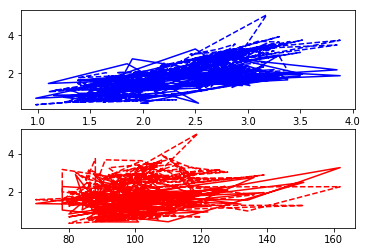

In [7]:
# create a figure and an array of axes: 2 rows, 1 column with shared y axis

fig, ax = plt.subplots(2, 1, sharey = True)

# plot data in the top axes
ax[0].plot(wine_data['total_phenols'].values, wine_data['proanthocyanins'].values, color = 'b')
ax[0].plot(wine_data['total_phenols'].values, wine_data['flavanoids'].values, color ='b', linestyle='--')

# plot data in the bottom axes
ax[1].plot(wine_data['magnesium'].values, wine_data['proanthocyanins'].values, color = 'r')
ax[1].plot(wine_data['magnesium'].values, wine_data['flavanoids'].values, color ='r', linestyle='--')

# display
plt.show()

# Plotting time-series

In [8]:
# get the dataset
daily_order = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv", sep=';')
daily_order.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [9]:
daily_order = daily_order.groupby('Week of the month (first week, second, third, fourth or fifth week').sum()

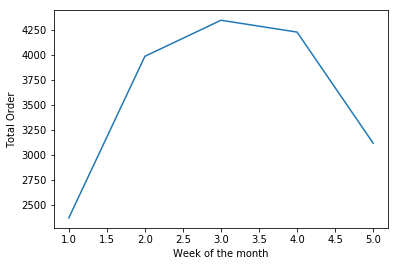

In [10]:
# create a figure and axes
fig, ax = plt.subplots()

# add the time sereis for "Total orders"
ax.plot(daily_order.index.values, daily_order['Target (Total orders)'].values)

# set the x-axis label
ax.set_xlabel('Week of the month')

# set the y-axis label
ax.set_ylabel('Total Order')

# show the figure
plt.show()

## Using a time index to zoom in

In [11]:
# get the dataset
sales = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv", index_col = 0, parse_dates= True)
sales.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


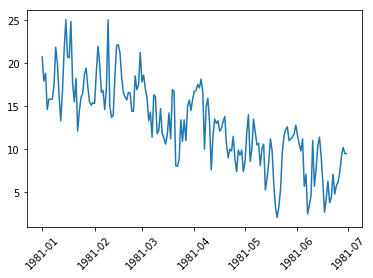

In [12]:
# zoom in on a particular period within the time-series using Pandas indexing facilities

# create a figure and ax
fig, ax = plt.subplots()

# create variable shampoo_sales with date, the 1st half of year 1981
shampoo_sales = sales["1981-01-01" : "1981-06-30"]

# plot
ax.plot(shampoo_sales.index.values, shampoo_sales['Temp'].values)


plt.xticks(rotation = 45)

# display the plt
plt.show()

## Plotting two variables

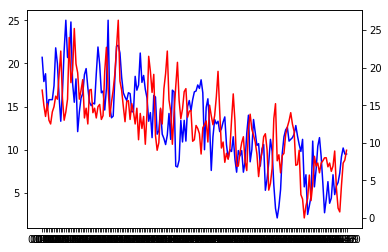

In [13]:
from matplotlib.dates import DateFormatter

# create a Figure and axes
fig, ax = plt.subplots()

shampoo_sales2 = sales["1982-01-01": "1982-06-30"]

# plot the sales data for 1st half of the year 1981 in blue
ax.plot(shampoo_sales.index.strftime("%m-%d").values, shampoo_sales["Temp"].values, color = "b")

# create a twin axes that shares the x-axis
ax2 = ax.twinx()

# plot the sales data for 1st half of the year 1982 in red
ax2.plot(shampoo_sales2.index.strftime("%m-%d").values, shampoo_sales2["Temp"].values, color = "r")

plt.xticks(rotation = 90)

plt.show()

## defining a function that plots time-series data

In [14]:
# define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    
    # plot the inputs x, y in the provided color
    axes.plot(x, y, color = color)
    
    # set the x-axis label
    axes.set_xlabel(xlabel)
    
    # set the y-axis label
    axes.set_ylabel(ylabel, color = color)
    
    # set the color tick params for y axis
    axes.tick_params('y', colors = color)

/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


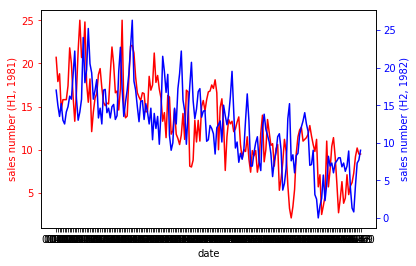

In [15]:
# using a plotting function

fig, ax = plt.subplots()

plot_timeseries(ax, shampoo_sales.index.strftime("%m-%d"), shampoo_sales.Temp, 'red', 'date', 'sales number (H1, 1981)')

ax2 = ax.twinx()

plot_timeseries(ax2, shampoo_sales2.index.strftime("%m-%d"), shampoo_sales2.Temp, 'blue', 'date', 'sales number (H2, 1982)')

plt.show()

# Annotating a lot of time-series data

In [16]:
# pick data to use

sales_data = sales['1981-01-01' : '1981-12-31']
sales_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [17]:
# check the lowest sales of the year and its date
sales_data.loc[sales_data.Temp == sales_data.Temp.min()]

,Temp
Date,
1981-05-20,2.1


In [18]:
# check the highest sales of the year and its date
sales_data.loc[sales_data.Temp == sales_data.Temp.max()]

,Temp
Date,
1981-01-15,25.0
1981-02-09,25.0


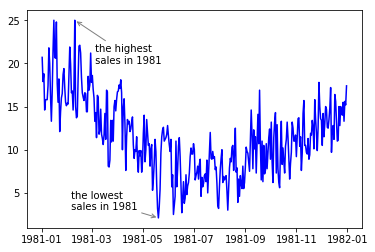

In [19]:
# creat figure

fig, ax = plt.subplots()

# plot the sales in 1981

ax.plot(sales_data.index.values, sales_data['Temp'].values, color = 'blue')

# annotate the date at which sales was the lowest
ax.annotate(' the lowest\n sales in 1981', xy = (pd.Timestamp('1981-05-20'), 2.1), xytext =(pd.Timestamp('1981-02-01'), 3), arrowprops = {'arrowstyle':'->', 'color':'gray'})
ax.annotate(' the highest\n sales in 1981', xy = (pd.Timestamp('1981-02-09'), 25.0), xytext =(pd.Timestamp('1981-03-01'), 20), arrowprops = {'arrowstyle':'->', 'color':'gray'})

plt.show()

In [44]:
sales['month'] = sales.index.month

In [20]:
# data

sales['year'] = sales.index.year
sales.groupby('year').sum()

,Temp
year,
1981,4203.8
1982,3936.0
1983,4083.4
1984,3866.0
1985,4065.2
1986,3943.2
1987,3961.4
1988,4369.8
1989,4110.6


In [21]:
sales_year =sales.groupby('year').sum()

# bar chart

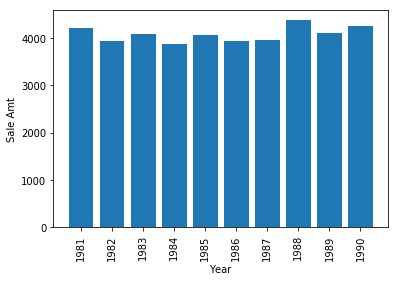

In [22]:
# create figure

fig, ax = plt.subplots()

# plot a bar-chart of sales of each year
ax.bar(sales_year.index, sales_year['Temp'])

# set the x-axis tick labels to year
ax.set_xticks(sales_year.index.tolist())
ax.set_xticklabels(sales_year.index, rotation = 90)
ax.set_xlabel('Year')

# set the y-axis label
ax.set_ylabel('Sale Amt')


plt.show()

# Stacked bar chart

In [45]:
# prepare data

quarter = ['Q'+ str((m-1)//3 + 1) for m  in sales['month'].tolist()]
sales['Quarter'] = quarter
sales_by_quarter = sales.groupby(['year','Quarter']).sum()
sales_by_quarter.head()

Temp  month
year Quarter               
1981 Q1       1462.6    180
     Q2        884.1    455
     Q3        763.6    735
     Q4       1093.5   1012
1982 Q1       1422.4    180

In [46]:
sales_pivot = pd.pivot_table(sales_by_quarter, values = 'Temp', index = 'year', columns = 'Quarter')
sales_pivot.head()

Quarter,Q1,Q2,Q3,Q4
year,,,,
1981,1462.6,884.1,763.6,1093.5
1982,1422.4,809.4,607.3,1096.9
1983,1368.3,829.5,759.8,1125.8
1984,1275.9,805.9,696.6,1087.6
1985,1325.9,893.5,691.0,1154.8


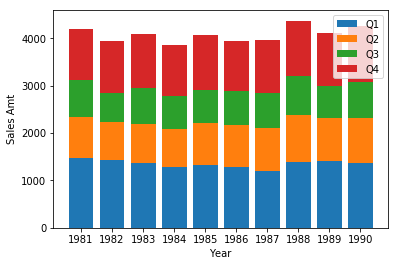

In [47]:
fig, ax = plt.subplots()

# add bars for 'Q1' with the label with 'Q1'
ax.bar(sales_pivot.index, sales_pivot.Q1.values, label = 'Q1')

# add bars for 'Q2' with the label with 'Q2'
ax.bar(sales_pivot.index, sales_pivot.Q2.values, label = 'Q2', bottom = sales_pivot.Q1)

# add bars for 'Q3' with the label with 'Q3'
ax.bar(sales_pivot.index, sales_pivot.Q3.values, label = 'Q3', bottom = sales_pivot.Q1 + sales_pivot.Q2)

# add bars for 'Q4' with the label with 'Q4'
ax.bar(sales_pivot.index, sales_pivot.Q4.values, label = 'Q4', bottom = sales_pivot.Q1 + sales_pivot.Q2 + sales_pivot.Q3)

# set x ticks
ax.set_xticks(sales_pivot.index.tolist())

# set x, y labels
ax.set_xlabel('Year')
ax.set_ylabel('Sales Amt')

# display the legend
ax.legend(loc = 'upper right')

plt.show()

# creating histograms

In [26]:
# read the data
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [35]:
# split into three group

high = (gss['educ'] <=  12)
asso = (gss['educ'] >= 14) & (gss['educ'] <16)
bach = (gss['educ'] >=16)

income = gss['realinc']

inc_high = income[high]
inc_asso = income[asso]
inc_bach = income[bach]


In [90]:
# pick interquantile range for each group

# IQR for high school graduates
inc_high_IQR = inc_high[(inc_high >= inc_high.quantile(0.25))&(inc_high <= inc_high.quantile(0.75))]

# IQR for associate degree holders
inc_asso_IQR = inc_asso[(inc_asso >= inc_asso.quantile(0.25))&(inc_asso <= inc_asso.quantile(0.75))]

# IQR for bachelor degree holders
inc_bach_IQR = inc_bach[(inc_bach >= inc_bach.quantile(0.25))&(inc_bach <= inc_bach.quantile(0.75))]

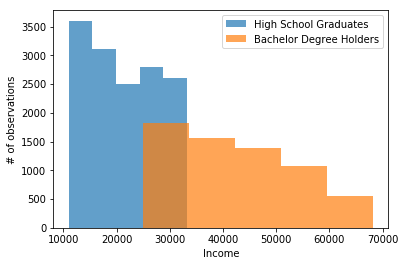

In [77]:
# create figure and axes

fig, ax = plt.subplots()

# plot a histogram of 'income' for high-school graduates
ax.hist(inc_high_IQR, label= 'High School Graduates', bins = 5, alpha = 0.7)

# compare a histogram of 'income' for bachelor degree owner
ax.hist(inc_bach_IQR, label= 'Bachelor Degree Holders', bins = 5, alpha = 0.7)

# set x,y axis label
ax.set_xlabel('Income')
ax.set_ylabel('# of observations')

plt.legend()
plt.show()

# "Step" histogram

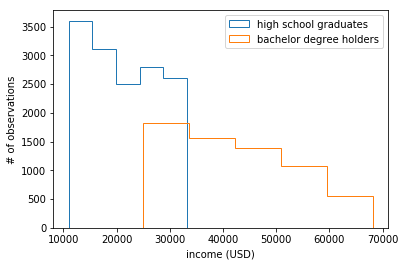

In [78]:
fig, ax = plt.subplots()

# plot a histogram of 'income' for high-school graduates
ax.hist(inc_high_IQR, label="high school graduates", histtype = "step", bins =5)

# plot a histogram of 'income' for bachelor degree holders
ax.hist(inc_bach_IQR, label="bachelor degree holders", histtype = "step", bins =5)

ax.set_xlabel("income (USD)")
ax.set_ylabel("# of observations")
              
# add the legend and show the figure
ax.legend()
plt.show()

# adding error-bars to a bar chart

<BarContainer object of 1 artists>

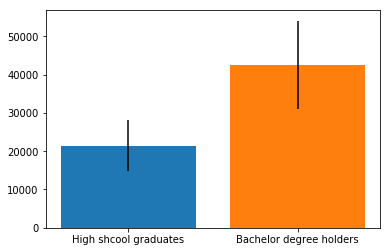

In [79]:
fig, ax = plt.subplots()

# add a bar for the high school graduates' income's mean/std
ax.bar("High shcool graduates", inc_high_IQR.mean(), yerr = inc_high_IQR.std())

# add a bar for the bachelor degree holders' income's mean/std
ax.bar("Bachelor degree holders", inc_bach_IQR.mean(), yerr = inc_bach_IQR.std())

# creating boxplots

boxplots provide 
- median of the distribution
- inter-quantile range
- expected range of approx 99% of data
- outliers

In [86]:
inc_high.reset_index(drop = True, inplace = True)
inc_asso.reset_index(drop = True, inplace = True)

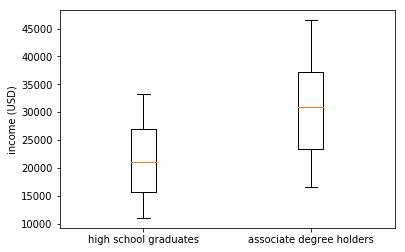

In [95]:
fig, ax = plt.subplots()

# create a boxplots
ax.boxplot([inc_high_IQR, inc_asso_IQR])

# add x-axis tick label
ax.set_xticklabels(['high school graduates', 'associate degree holders'])

# add y-axis label
ax.set_ylabel('income (USD)')

plt.show()

# simple scatter plot

bi-variate visualization technique

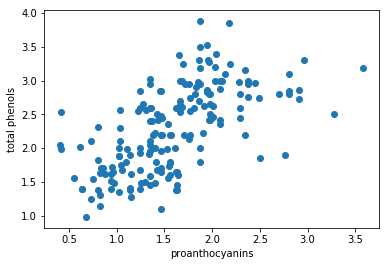

In [99]:
fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

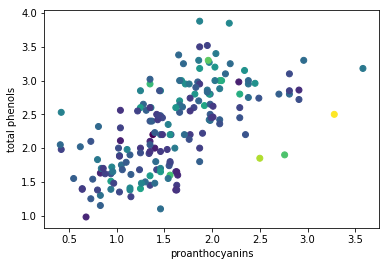

In [106]:
# encoding 3rd variable by color

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins', c = wine_data.magnesium)

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

# selecting a style for printing

overall style of the figure

## Guidelines for choosing plotting style
- Dark backgrounds are usually less visible
- If color is important, consider choosing colorblind=friendly options
  -> seaborn-colorblind or tableau-colorblind10
- If you think that someone will want to print your figure, use less ink (avoid colored backgrounds)
- If it will be printed in B&W, use the "grayscale" style.

In [107]:
plt.style.use('ggplot')

# ggplot is the style of R library

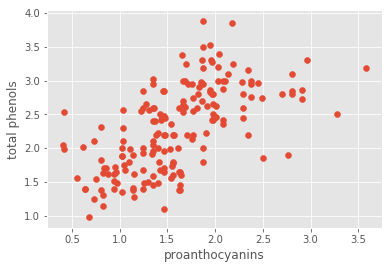

In [108]:
fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

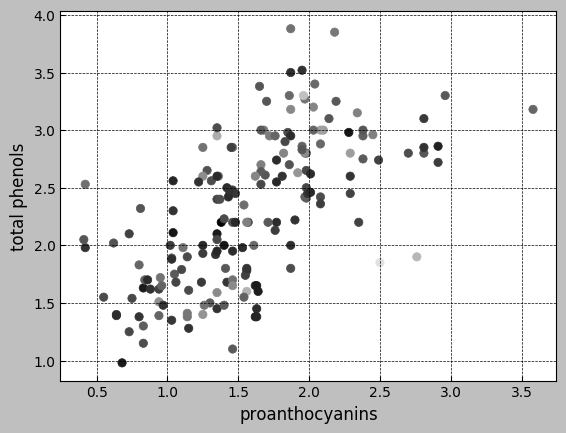

In [113]:
plt.style.use('grayscale')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins', c = wine_data.magnesium)

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

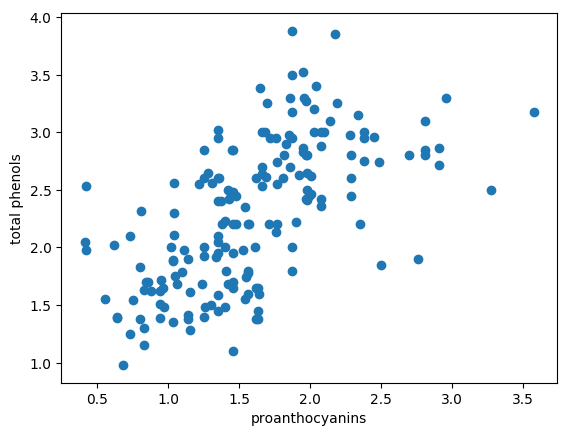

In [109]:
plt.style.use('default')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

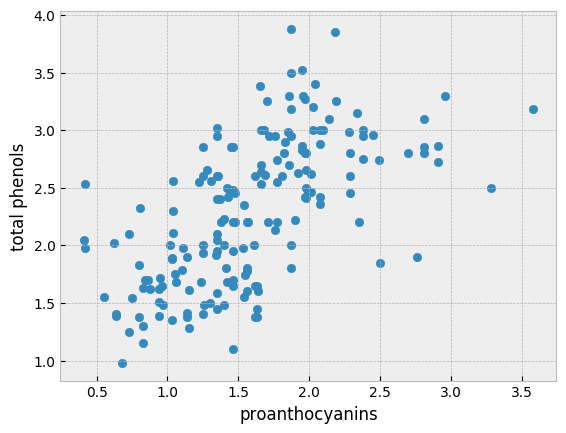

In [110]:
plt.style.use('bmh')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

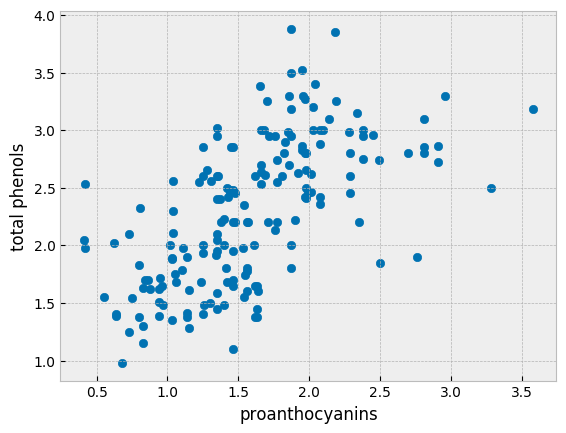

In [111]:
plt.style.use('seaborn-colorblind')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

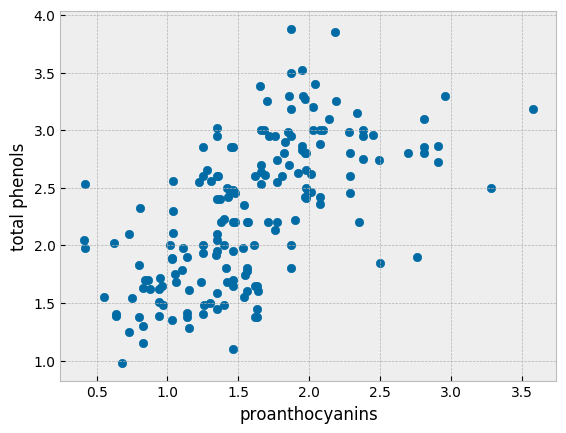

In [112]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

plt.show()

# saving a file several times

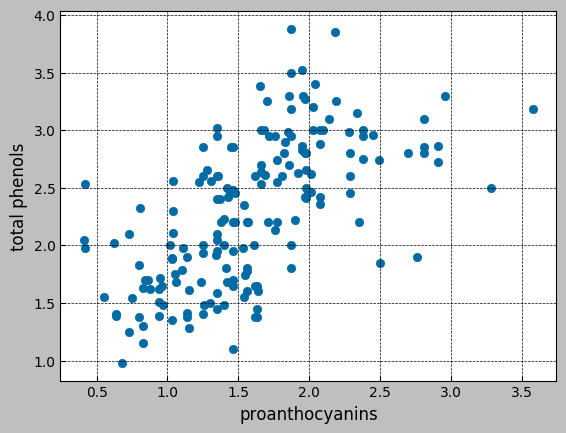

In [115]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

fig.savefig("my_figure.png")

# dpi adjustment

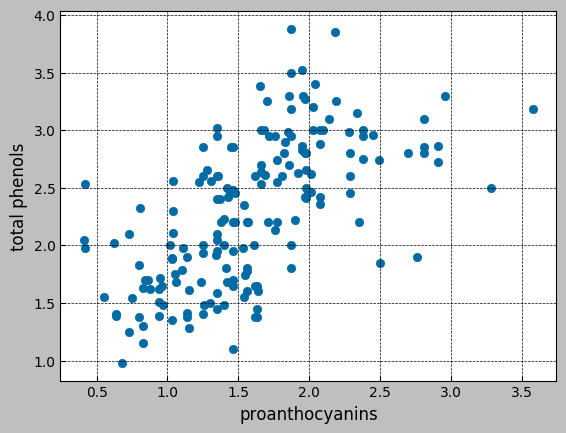

In [116]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

fig.savefig('my_figure_300dpi.png', dpi = 300)

# size adjustment

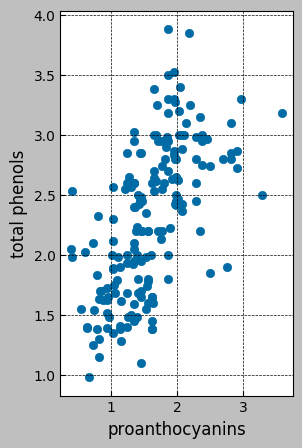

In [117]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots()

# create scatterplot 

ax.scatter(wine_data.proanthocyanins, wine_data.total_phenols,label = 'proanthocyanins')

# set x-axis label
ax.set_xlabel('proanthocyanins')

# set y-axis label
ax.set_ylabel('total phenols')

fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

# Automate your visualization

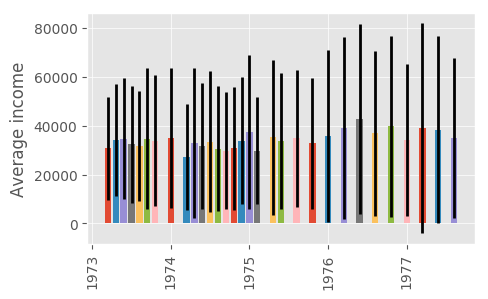

In [124]:
plt.style.use('ggplot')

# average high school income level each year
gss_year = gss.year.unique()

fig, ax = plt.subplots()

# loop over the different years

for yyyy in gss_year:
    
    # extract the rows only for the year
    year_df = gss[gss.year == yyyy]
    
    # add a bar for the income mean with std y error bar
    ax.bar(yyyy, year_df['realinc'].mean(), yerr = year_df['realinc'].std())

ax.set_ylabel('Average income')
ax.set_xticklabels(gss_year, rotation = 90)

# save the figure to the file
fig.set_size_inches([5,3])
fig.savefig('gss_year_income.png')

In [125]:
gss_year

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])